In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
LGR_df = pd.read_csv("../../data/LGR_transcriptome/results_ave_mae_1.csv", index_col=0)
LGR_df

,Gene,ave_MAE
0,lipe,1.017414
1,LOC106564730,1.024242
2,LOC106602690,1.023597
3,LOC106581127,1.022533
4,LOC106588400,0.999736
...,...,...
474,LOC106591957,1.025322
475,LOC106606691,0.991557
476,LOC106592031,1.021712
477,LOC106608968,1.009791


In [3]:
GFGWA_df = pd.read_csv("../../data/GFGWA_genes_minpval.csv", index_col=0)
# GFGWA_df["minpval"] = GFGWA_df[['pval_AltGreater', 'pval_AltLess']].min(axis=1)
GFGWA_df

,minpval
143b2,0.048587
2a5e,0.000469
4f2,0.012341
5nt1a,0.060738
5ntc,0.009990
...,...
zpr1,0.000167
zranb2,0.000016
zswim7,0.000152
zswim8,0.011779


In [4]:
# Add percentiles
LGR_df["LGR_pct"] = LGR_df["ave_MAE"].rank(pct=True)
LGR_df.sort_values(by="LGR_pct", ascending=True, inplace=True)
LGR_df

,Gene,ave_MAE,LGR_pct
230,LOC106566372,0.964860,0.002088
308,hba,0.964900,0.004175
396,LOC106607380,0.965438,0.006263
442,duox,0.969507,0.008351
86,LOC106583594,0.974423,0.010438
...,...,...,...
412,LOC106569466,1.028349,0.991649
197,LOC106590792,1.029229,0.993737
89,LOC106610272,1.029579,0.995825
423,LOC106571490,1.030534,0.997912


In [5]:
# GFGWA_df["GFGWA_pct"] = GFGWA_df["log_mws_score"].rank(pct=True)
# GFGWA_df.sort_values(by="GFGWA_pct", ascending=False, inplace=True)
# GFGWA_df

In [6]:
combined_df = pd.merge(left=GFGWA_df, left_on=GFGWA_df.index, right=LGR_df, right_on=LGR_df["Gene"])
combined_df

,key_0,minpval,Gene,ave_MAE,LGR_pct
0,LOC100136378,2.045360e-03,LOC100136378,1.016377,0.555324
1,LOC100136415,1.880512e-05,LOC100136415,1.005957,0.227557
2,LOC100136435,6.673468e-04,LOC100136435,1.021895,0.841336
3,LOC100136455,2.126384e-05,LOC100136455,1.006289,0.240084
4,LOC100194634,2.410694e-03,LOC100194634,1.016296,0.549061
...,...,...,...,...,...
250,trappc5,3.282887e-01,trappc5,1.011827,0.379958
251,txnrd2.2,5.015886e-04,txnrd2.2,1.013162,0.434238
252,ub2e3,7.498264e-03,ub2e3,1.013842,0.446764
253,zanl,1.974281e-09,zanl,1.021289,0.805846


In [7]:
len(combined_df["Gene"].unique())

255

In [8]:
combined_df["logminpval"] = -np.log10(combined_df["minpval"] )
combined_df

,key_0,minpval,Gene,ave_MAE,LGR_pct,logminpval
0,LOC100136378,2.045360e-03,LOC100136378,1.016377,0.555324,2.689230
1,LOC100136415,1.880512e-05,LOC100136415,1.005957,0.227557,4.725724
2,LOC100136435,6.673468e-04,LOC100136435,1.021895,0.841336,3.175648
3,LOC100136455,2.126384e-05,LOC100136455,1.006289,0.240084,4.672358
4,LOC100194634,2.410694e-03,LOC100194634,1.016296,0.549061,2.617858
...,...,...,...,...,...,...
250,trappc5,3.282887e-01,trappc5,1.011827,0.379958,0.483744
251,txnrd2.2,5.015886e-04,txnrd2.2,1.013162,0.434238,3.299652
252,ub2e3,7.498264e-03,ub2e3,1.013842,0.446764,2.125039
253,zanl,1.974281e-09,zanl,1.021289,0.805846,8.704591


In [9]:
pvalthreshold = -np.log10(0.05 )
pvalthreshold

1.3010299956639813

In [10]:
priority = combined_df[combined_df["LGR_pct"] < 0.05]
priority = priority[priority["minpval"] < 0.05]
priority

,key_0,minpval,Gene,ave_MAE,LGR_pct,logminpval
100,LOC106583220,0.000157,LOC106583220,0.989100,0.037578,3.802906
143,LOC106601072,0.031004,LOC106601072,0.975660,0.012526,1.508581
151,LOC106602771,0.000001,LOC106602771,0.983748,0.027140,5.907133
154,LOC106603702,0.032821,LOC106603702,0.985027,0.031315,1.483847
186,LOC106613694,0.003089,LOC106613694,0.991863,0.048017,2.510159
223,otub1,0.001217,otub1,0.983916,0.029228,2.914580


In [11]:
priority_list = list(priority["key_0"].unique())
priority_list

['LOC106583220',
 'LOC106601072',
 'LOC106602771',
 'LOC106603702',
 'LOC106613694',
 'otub1']

In [12]:
combined_df_without_priority = combined_df[~combined_df["key_0"].isin(priority_list)]
combined_df_without_priority

,key_0,minpval,Gene,ave_MAE,LGR_pct,logminpval
0,LOC100136378,2.045360e-03,LOC100136378,1.016377,0.555324,2.689230
1,LOC100136415,1.880512e-05,LOC100136415,1.005957,0.227557,4.725724
2,LOC100136435,6.673468e-04,LOC100136435,1.021895,0.841336,3.175648
3,LOC100136455,2.126384e-05,LOC100136455,1.006289,0.240084,4.672358
4,LOC100194634,2.410694e-03,LOC100194634,1.016296,0.549061,2.617858
...,...,...,...,...,...,...
250,trappc5,3.282887e-01,trappc5,1.011827,0.379958,0.483744
251,txnrd2.2,5.015886e-04,txnrd2.2,1.013162,0.434238,3.299652
252,ub2e3,7.498264e-03,ub2e3,1.013842,0.446764,2.125039
253,zanl,1.974281e-09,zanl,1.021289,0.805846,8.704591


In [13]:
combined_priority_only = combined_df[combined_df["key_0"].isin(priority_list)]
combined_priority_only

,key_0,minpval,Gene,ave_MAE,LGR_pct,logminpval
100,LOC106583220,0.000157,LOC106583220,0.989100,0.037578,3.802906
143,LOC106601072,0.031004,LOC106601072,0.975660,0.012526,1.508581
151,LOC106602771,0.000001,LOC106602771,0.983748,0.027140,5.907133
154,LOC106603702,0.032821,LOC106603702,0.985027,0.031315,1.483847
186,LOC106613694,0.003089,LOC106613694,0.991863,0.048017,2.510159
223,otub1,0.001217,otub1,0.983916,0.029228,2.914580


In [14]:
light_green = (0.0, 0.6, 0.5)
pink = (1, 0.078, 0.576)

In [15]:
combined_priority_only.iloc[0]["Gene"]

'LOC106583220'

In [19]:
combined_priority_only.reset_index(drop=True, inplace=True)

In [26]:
combined_priority_only.reset_index(inplace=True) # create index column for plot

In [25]:
combined_priority_only

,index,key_0,minpval,Gene,ave_MAE,LGR_pct,logminpval
0,0,LOC106583220,0.000157,LOC106583220,0.989100,0.037578,3.802906
1,1,LOC106601072,0.031004,LOC106601072,0.975660,0.012526,1.508581
2,2,LOC106602771,0.000001,LOC106602771,0.983748,0.027140,5.907133
3,3,LOC106603702,0.032821,LOC106603702,0.985027,0.031315,1.483847
4,4,LOC106613694,0.003089,LOC106613694,0.991863,0.048017,2.510159
5,5,otub1,0.001217,otub1,0.983916,0.029228,2.914580


In [22]:
combined_priority_only.iloc[5]

key_0            otub1
minpval       0.001217
Gene             otub1
ave_MAE       0.983916
LGR_pct       0.029228
logminpval     2.91458
Name: 5, dtype: object

/tmp/ipykernel_4408/2470764992.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x = combined_priority_only["logminpval"],


Text(0, 0.5, 'LGR percentile')

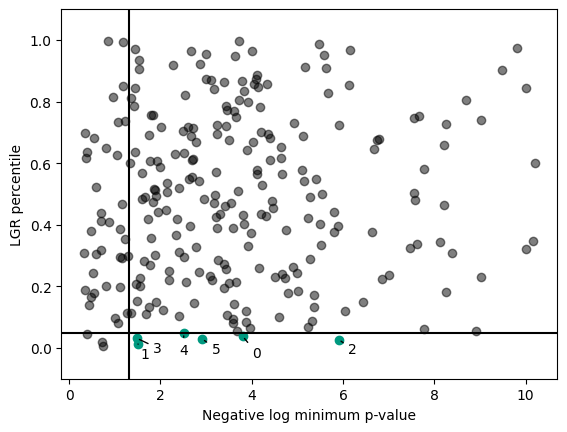

In [37]:
plt.scatter(x = combined_df_without_priority["logminpval"], 
            y = combined_df_without_priority["LGR_pct"],
            c='k',
            alpha=0.5)
plt.scatter(x = combined_priority_only["logminpval"], 
            y = combined_priority_only["LGR_pct"],
            c=light_green,
            alpha=1)
plt.axvline(x=pvalthreshold, c='k')
plt.axhline(y=0.05, c='k')
plt.ylim(-.1, 1.1)
plt.annotate(combined_priority_only.iloc[0]["index"], 
             (combined_priority_only.iloc[0]["logminpval"], 
              combined_priority_only.iloc[0]["LGR_pct"]), 
              textcoords="offset points", xytext=(10,-15), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[1]["index"], 
             (combined_priority_only.iloc[1]["logminpval"], 
              combined_priority_only.iloc[1]["LGR_pct"]), 
              textcoords="offset points", xytext=(5,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[2]["index"], 
             (combined_priority_only.iloc[2]["logminpval"], 
              combined_priority_only.iloc[2]["LGR_pct"]), 
              textcoords="offset points", xytext=(10,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[3]["index"], 
             (combined_priority_only.iloc[3]["logminpval"], 
              combined_priority_only.iloc[3]["LGR_pct"]), 
              textcoords="offset points", xytext=(15,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[4]["index"], 
             (combined_priority_only.iloc[4]["logminpval"], 
              combined_priority_only.iloc[4]["LGR_pct"]), 
              textcoords="offset points", xytext=(0,-15), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[5]["index"], 
             (combined_priority_only.iloc[5]["logminpval"], 
              combined_priority_only.iloc[5]["LGR_pct"]), 
              textcoords="offset points", xytext=(10,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.xlabel("Negative log minimum p-value")
plt.ylabel("LGR percentile")